# GBTDS: Potential Observational Strategy for Globular Clusters

### Import requisite python pacakages 

In [1]:
import sys
import os
import numpy as np
import pandas as pd
#import pint # pandas utility to add units
#pd.set_option("display.max.columns", None)
from itertools import groupby

### Import Matplotlib visualization tools

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm
%matplotlib inline

### Import Plotly visualization tools

In [23]:
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py #need to further explore this functionality 
import plotly.io as pio
#pio.renderers.default = "svg"
#pio.renderers.default = "notebook_connected"
pio.renderers.default = "jupyterlab+png" #attempting to render in Github and in jupyter ecosystem

### Import astropy coordinate/unit packages

In [4]:
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u

### Load the globular cluster compilation file

In [5]:
# For the compilation of Inner Galaxy Globular Clusters, these literature publications were employed: Bica2024, Garro2024, Belorukov(2024), 
# Perez-Villegas(2020), and references therein 
ig_clusters = pd.read_csv('Inner_Galaxy_GC_Compilation.csv')
ig_clusters.style.format(precision=2).hide()

Cluster_Name,RA_deg,DEC_deg,Gal_l_deg,Gal_b_deg,D_sun_kpc,D_sun_err_kpc,Fe_H,Fe_H_err,M_V,Reference
BH_261,273.52,-28.63,3.36,-5.27,6.50,0.65,-1.09,0.05,-4.06,Bica2024
Camargo_1102,260.44,-26.54,359.14,5.73,8.20,1.20,-1.70,0.20,-6.30,Bica2024
Camargo_1103,271.63,-25.16,5.60,-2.12,5.00,0.80,-1.80,0.30,-6.90,Bica2024
Camargo_1104,271.31,-24.98,5.62,-1.78,5.40,1.00,-1.80,0.30,-5.70,Bica2024
Camargo_1107,264.24,-30.15,357.98,0.96,4.00,0.70,-2.20,0.40,-6.60,Bica2024
Camargo_1108,266.52,-30.86,358.40,-1.09,3.30,0.50,-1.80,0.30,-8.40,Bica2024
Camargo_1109,266.86,-26.65,2.17,0.84,4.30,0.60,-1.50,0.20,-6.40,Bica2024
Djorg_1,266.86,-33.06,356.67,-2.48,9.30,0.50,-1.54,0.13,-6.98,Bica2024
ESO393-12,264.66,-35.65,353.51,-2.28,8.20,0.40,-0.60,0.20,-5.30,Bica2024
ESO452-SC11,249.85,-28.39,351.91,12.10,6.50,0.65,-0.81,0.13,-4.02,Bica2024


### Perform coordinate transformation

In [6]:
gal = SkyCoord(ig_clusters.Gal_l_deg, ig_clusters.Gal_b_deg, frame='galactic', unit=u.deg)

### Generate Matplotlib Visualizations

#### General Aitoff Projection

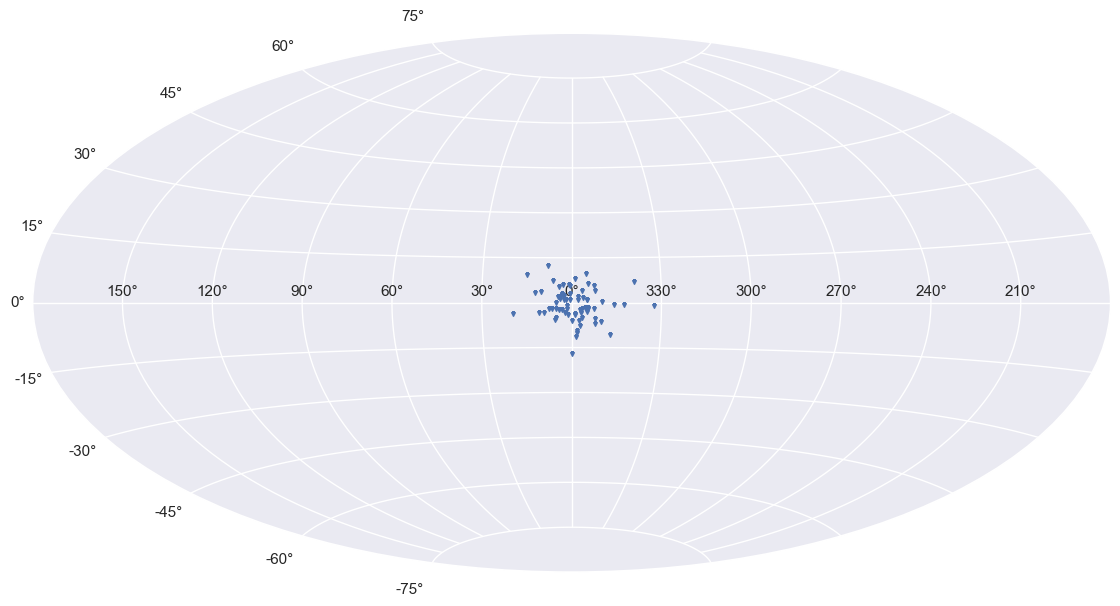

In [7]:
sns.set()
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, marker='v', s=7)
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.show()

#### Globular Clusters in the Inner Galaxy

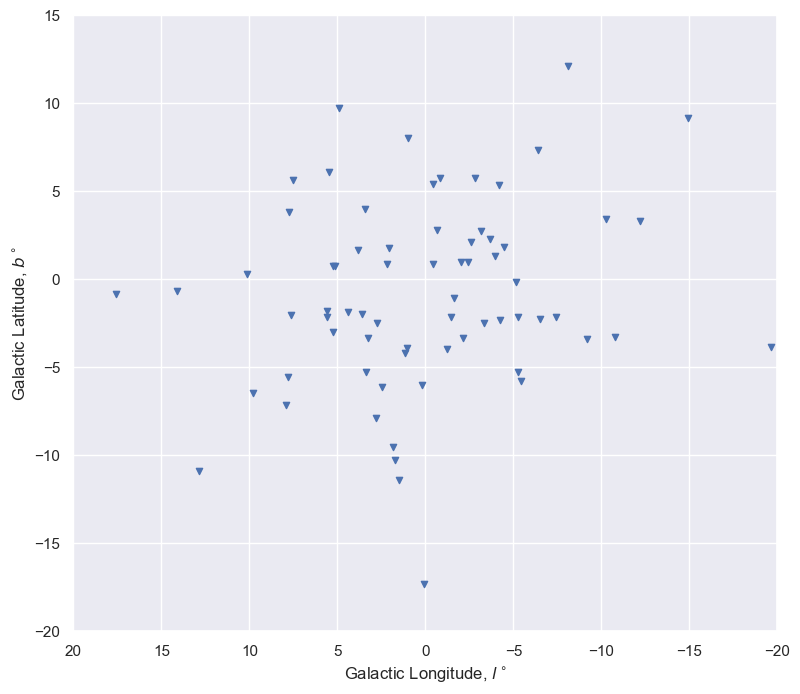

In [8]:
sns.set()
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(gal.l.wrap_at('180d'), gal.b, marker='v', s=20)
ax.set_xlim(20., -20.)
ax.set_ylim(-20., 15.)
plt.xlabel(r'Galactic Longitude, $l^\circ$')
plt.ylabel(r'Galactic Latitude, $b^\circ$')
plt.show()

#### Bulge Region Overlay: Nominal GBTDS 7-field Design 

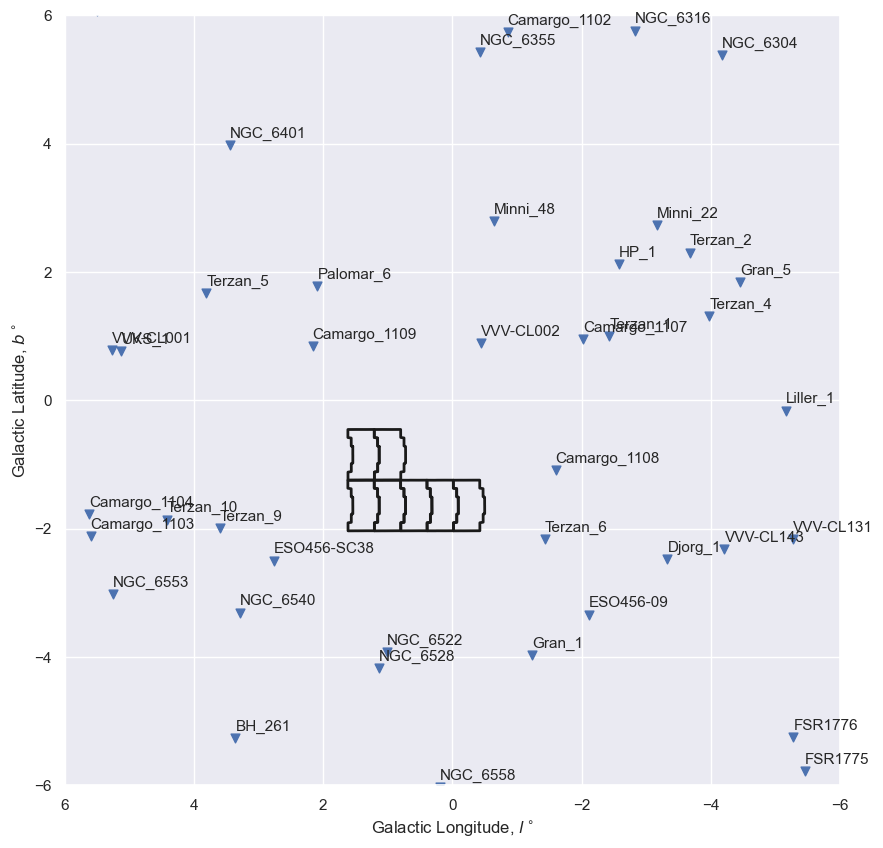

In [9]:
sns.set()
layout='layout_7f_3'
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(1,1,1)

# Field overlay code from M. Penny WFIRST Paper
fields = []
with open('%s.outline.lbad' % (layout)) as fp:
    for k, g in groupby(fp, lambda x: x.startswith(' ')):
        if not k:
            fields.append(np.array([[float(x) for x in d.split()] for d in g if len(d.strip())]))
for f in fields:
        ax.plot(f[:,1],f[:,2],'k-',lw=2)

ax.scatter(gal.l.wrap_at('180d'), gal.b, marker='v', s=40)
ax.set_xlim(6, -6)
ax.set_ylim(-6, 6)
plt.xlabel(r'Galactic Longitude, $l^\circ$')
plt.ylabel(r'Galactic Latitude, $b^\circ$')
# Kludgy nnotation method
x = np.array(gal.l.wrap_at('180d'))
y = np.array(gal.b)
z = np.array(ig_clusters.Cluster_Name)
for i in range(len(x)): 
    ax.annotate(z[i], (x[i], y[i]+0.12), fontsize=11) 
plt.show()

#### Bulge Region Overlay: GBTDS 7-field + Galactic Center Design 

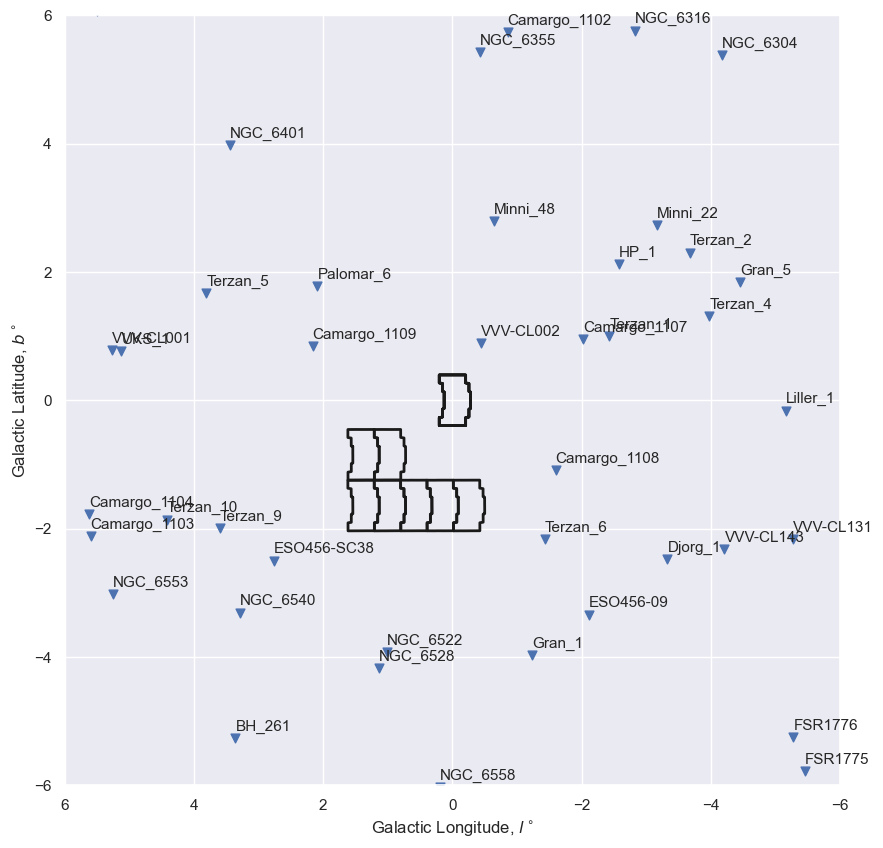

In [25]:
sns.set()
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(1,1,1)

# Field overlay code from M. Penny WFIRST Paper
## 7-field Baseline
layout='layout_7f_3'
fields = []
with open('%s.outline.lbad' % (layout)) as fp:
    for k, g in groupby(fp, lambda x: x.startswith(' ')):
        if not k:
            fields.append(np.array([[float(x) for x in d.split()] for d in g if len(d.strip())]))
for f in fields:
        ax.plot(f[:,1],f[:,2],'k-',lw=2)

## Galactic Center field 
layout='layout_7f_gal-cen'
fields = []
with open('%s.outline.lbad' % (layout)) as fp:
    for k, g in groupby(fp, lambda x: x.startswith(' ')):
        if not k:
            fields.append(np.array([[float(x) for x in d.split()] for d in g if len(d.strip())]))
for f in fields:
        ax.plot(f[:,1],f[:,2],'k-',lw=2)
    
ax.scatter(gal.l.wrap_at('180d'), gal.b, marker='v', s=40)
ax.set_xlim(6, -6)
ax.set_ylim(-6, 6)
plt.xlabel(r'Galactic Longitude, $l^\circ$')
plt.ylabel(r'Galactic Latitude, $b^\circ$')
# Kludgy annotation method
x = np.array(gal.l.wrap_at('180d'))
y = np.array(gal.b)
z = np.array(ig_clusters.Cluster_Name)
for i in range(len(x)): 
    ax.annotate(z[i], (x[i], y[i]+0.12), fontsize=11) 
# Write to file and display to screen
plt.show()

### Plotly Visualizations

#### Parameter bookkeeping and coodinate transformation

In [11]:
# Sigh, a bit kludgy 
# gal_l_wr = [(q+180)%360 - 180 for q in ig_clusters.Gal_l_deg]
gal_l_wrap = gal.l.wrap_at('180d').deg
gal_b = gal.b
Cluster_Name = ig_clusters['Cluster_Name']

#### Compilation of Globular Clusters in the Inner Galaxy (Zoom-In/Zoom-Out Plotly Go Visualization)

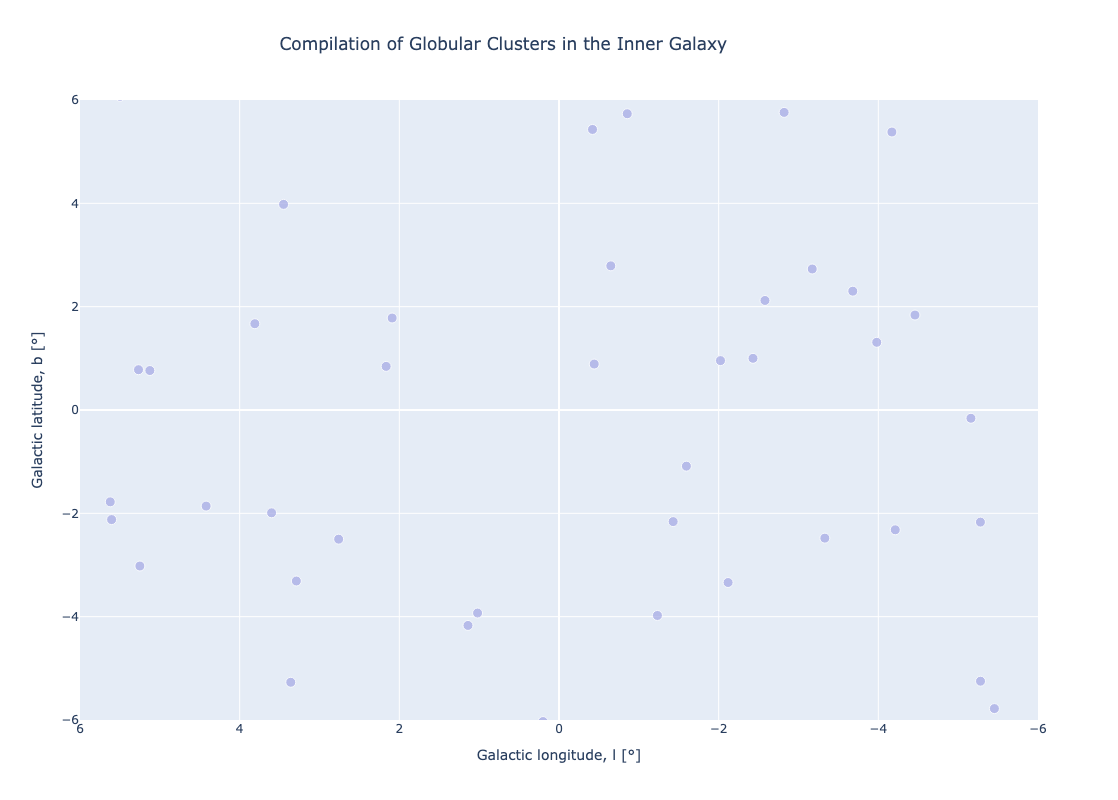

In [19]:
fig = go.FigureWidget([go.Scatter(x=gal_l_wrap, y=gal_b, mode='markers', hovertext=(Cluster_Name))])

scatter = fig.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
fig.layout.hovermode = 'closest'

fig.update_xaxes(title_text = "Galactic longitude, l [°]", range=[6,-6])
fig.update_yaxes(title_text = "Galactic latitude, b [°]", range=[-6,6])
fig.update_layout(title_text='Compilation of Globular Clusters in the Inner Galaxy', title_x=0.25, 
               autosize=False, width=800, height=800)

# Incorporate functionality to zoom-in/zoom-out with the double click action on a data point 
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
            
scatter.on_click(update_point)
fig.show()
# For static image render in Github 
# fig.show("svg")
# To render a large-size plot display in a separate browser window
# fig.show(renderer="browser") 

#### Compilation of Globular Clusters in the Inner Galaxy (Plotly Express Visualization)

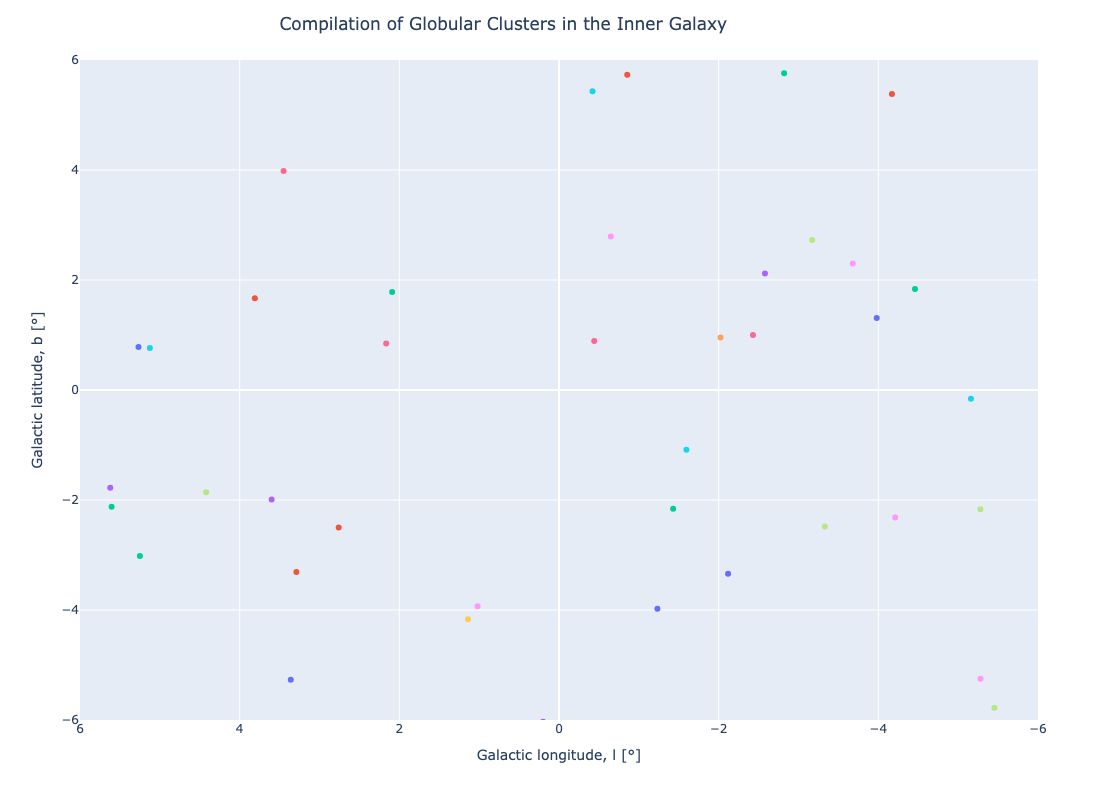

In [22]:
fig = px.scatter(x=gal_l_wrap, y=gal_b, color=Cluster_Name).update_layout(xaxis_title="Galactic longitude, l [°]",
                                                                    yaxis_title="Galactic latitude, b [°]", showlegend=False)
fig.update_traces(hovertemplate='<br>l</b>: %{x:.2f}'+ '<br>b</b>: %{y:.2f}')
fig.update_yaxes(range=[-6, 6])
fig.update_xaxes(range=[6, -6])
fig.update_layout(title_text='Compilation of Globular Clusters in the Inner Galaxy', title_x=0.25, 
    autosize=False, width=800, height=800)
#fig.write_html("GBTDS_GC-Compilation.html")
#fig.write_image("GBTDS_GC-Compilation.pdf")
fig.show()
# For static image render in Github 
# fig.show("svg")

#### Additional Diagram Displaying Bulge Region Globular Clusters
Diagram below taken from Bica et al. (2024) with a slight modification from M. Zoccali.

In [79]:
from IPython.display import IFrame, display
file = "Bica2024_Fig1_MZ-Mod.png"
IFrame(file, width=1000, height=500)